In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


**Load the dataset.**

In [ ]:

data = pd.read_csv('emotion_dataset.csv')
data

,category,sentence
0,neutral,There are tons of other paintings that I thin...
1,sadness,"Yet the dog had grown old and less capable , a..."
2,fear,When I get into the tube or the train without ...
3,fear,This last may be a source of considerable disq...
4,anger,She disliked the intimacy he showed towards so...
...,...,...
11322,sadness,"My sweetheart left me, or rather we decided to..."
11323,sadness,"Well , it's too bad that we like different kin..."
11324,neutral,It sure is .
11325,sadness,He ’ s got laid off again . I do feel sorry fo...


In [ ]:
# Clean the data
def clean(text):
    # Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text.strip()

In [ ]:
data.shape

(11327, 2)

In [ ]:
#Check for missing values
data.isnull().sum()

category    0
sentence    0
dtype: int64

In [ ]:
data['clean_text'] = data['sentence'].apply(clean)
data

,category,sentence,clean_text
0,neutral,There are tons of other paintings that I thin...,There are tons of other paintings that I think...
1,sadness,"Yet the dog had grown old and less capable , a...",Yet the dog had grown old and less capable and...
2,fear,When I get into the tube or the train without ...,When I get into the tube or the train without ...
3,fear,This last may be a source of considerable disq...,This last may be a source of considerable disq...
4,anger,She disliked the intimacy he showed towards so...,She disliked the intimacy he showed towards so...
...,...,...,...
11322,sadness,"My sweetheart left me, or rather we decided to...",My sweetheart left me or rather we decided to ...
11323,sadness,"Well , it's too bad that we like different kin...",Well it s too bad that we like different kinds...
11324,neutral,It sure is .,It sure is
11325,sadness,He ’ s got laid off again . I do feel sorry fo...,He s got laid off again I do feel sorry for him


In [ ]:
data['category'].value_counts()

joy        2326
sadness    2317
anger      2259
neutral    2254
fear       2171
Name: category, dtype: int64

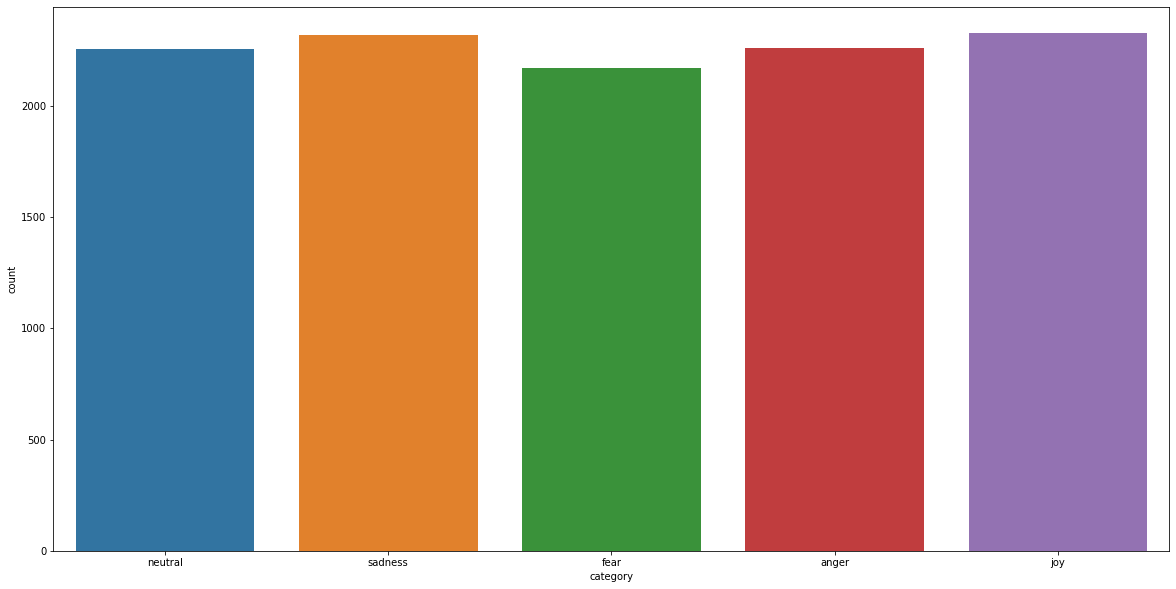

In [ ]:
#using seaborn to plt
plt.figure(figsize=(20, 10))
sns.countplot(x='category', data=data)
plt.show()

#Exploration
+ Text Cleaning
+ Sentiment Analysis
+ Keyword Extraction
    - Keywords for each category
    - Wordcloud

In [ ]:
#Tokenization, POS Tagging, Stopwords Removal

import nltk

nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
from nltk.tokenize import word_tokenize
def tokenize(text):
  tokens = word_tokenize(text)
  return tokens

from nltk import pos_tag
def get_pos_tagged(tokens): 
  tags = pos_tag(tokens)
  return tags

from nltk.corpus import stopwords
from nltk.corpus import wordnet
def remove_stopwords_from_tags(tags):
  pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
  newlist = []
  for word, tag in tags:
    if len(word) > 1 and word.lower() not in set(stopwords.words('english')):
        newlist.append(tuple([word, pos_dict.get(tag[0])]))
  return newlist

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
  formed_sentence = " "
  for word, pos in pos_data:
      if not pos:
          formed_sentence = formed_sentence + " " + word
      else:
          lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
          formed_sentence = formed_sentence + " " + lemma
  return formed_sentence


def perform_text_actions(text):
  text = clean(text)
  tokens = tokenize(text)
  tags = get_pos_tagged(tokens)
  clean_pos_data = remove_stopwords_from_tags(tags)
  lemma_sentence = lemmatize(clean_pos_data)
  clean_lemma = clean(lemma_sentence)
  return clean_lemma.strip()



In [ ]:
clean("Don't mixing #cosmetic brands. If it works for you, #goforit @MACMakeupLA @makeupjojo @MakeupByEric @cosmetichappy XO :)")

'Don t mixing cosmetic brands If it works for you goforit MACMakeupLA makeupjojo MakeupByEric cosmetichappy XO'

In [ ]:
#Stemming and lemmatization
data['clean_sentence'] = data['sentence'].apply(perform_text_actions)

In [ ]:
data[['sentence', 'clean_sentence']]

,sentence,clean_sentence
0,There are tons of other paintings that I thin...,ton painting think well
1,"Yet the dog had grown old and less capable , a...",Yet dog grow old less capable one day gillie c...
2,When I get into the tube or the train without ...,get tube train without pay ticket
3,This last may be a source of considerable disq...,last may source considerable disquiet one migh...
4,She disliked the intimacy he showed towards so...,dislike intimacy show towards resentful memory...
...,...,...
11322,"My sweetheart left me, or rather we decided to...",sweetheart leave rather decide break mutual co...
11323,"Well , it's too bad that we like different kin...",Well bad like different kind movie Maybe diffe...
11324,It sure is .,sure
11325,He ’ s got laid off again . I do feel sorry fo...,get lay feel sorry


In [ ]:
from textblob import TextBlob

In [ ]:
def getPolarity(text):
    score = TextBlob(text).sentiment.polarity
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [ ]:
cleaned_data = pd.DataFrame(data[['sentence', 'clean_sentence', 'category']])
cleaned_data['analysis'] = cleaned_data['clean_sentence'].apply(getPolarity)
cleaned_data.head()

,sentence,clean_sentence,category,analysis
0,There are tons of other paintings that I thin...,ton painting think well,neutral,Neutral
1,"Yet the dog had grown old and less capable , a...",Yet dog grow old less capable one day gillie c...,sadness,Positive
2,When I get into the tube or the train without ...,get tube train without pay ticket,fear,Neutral
3,This last may be a source of considerable disq...,last may source considerable disquiet one migh...,fear,Positive
4,She disliked the intimacy he showed towards so...,dislike intimacy show towards resentful memory...,anger,Neutral


In [ ]:
cleaned_data.groupby(['category', 'analysis']).size()

category  analysis
anger     Negative     853
          Neutral      862
          Positive     544
fear      Negative     718
          Neutral      816
          Positive     637
joy       Negative     209
          Neutral      716
          Positive    1401
neutral   Negative     162
          Neutral     1540
          Positive     552
sadness   Negative     948
          Neutral      830
          Positive     539
dtype: int64

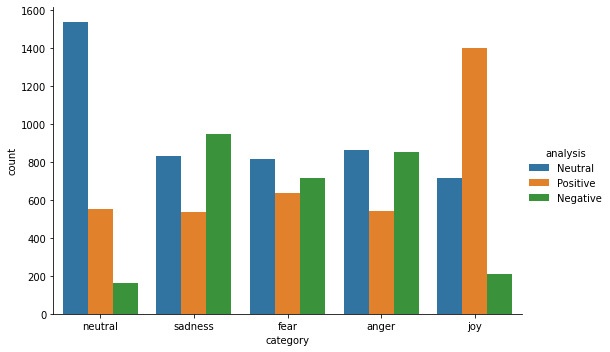

In [ ]:
sns.catplot(x="category", hue="analysis", data=cleaned_data, kind="count", aspect=1.5)

In [ ]:
#Keyword extraction
from collections import Counter

In [ ]:
def extract_keywords(text, num=50):
    tokens = [token for token in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [ ]:
category_list = cleaned_data['category'].unique().tolist()
category_list

['neutral', 'sadness', 'fear', 'anger', 'joy']

In [ ]:
#plot
def plot_most_common_words(my_dict, category):
    df = pd.DataFrame(my_dict.items(), columns=['token', 'count'])
    plt.figure(figsize=(20,10))
    plt.title("Word frequecy for category '{}'".format(category.upper()))
    sns.barplot(x='token', y='count', data=df)
    plt.xticks(rotation=45)
    plt.show()

#Wordcloud
from wordcloud import WordCloud

def plot_word_cloud(text, category):
    my_word_cloud = WordCloud().generate(text)
    plt.figure(figsize=(20, 10))
    plt.title("Word Cloud for category '{}'".format(category.upper()))
    plt.imshow(my_word_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

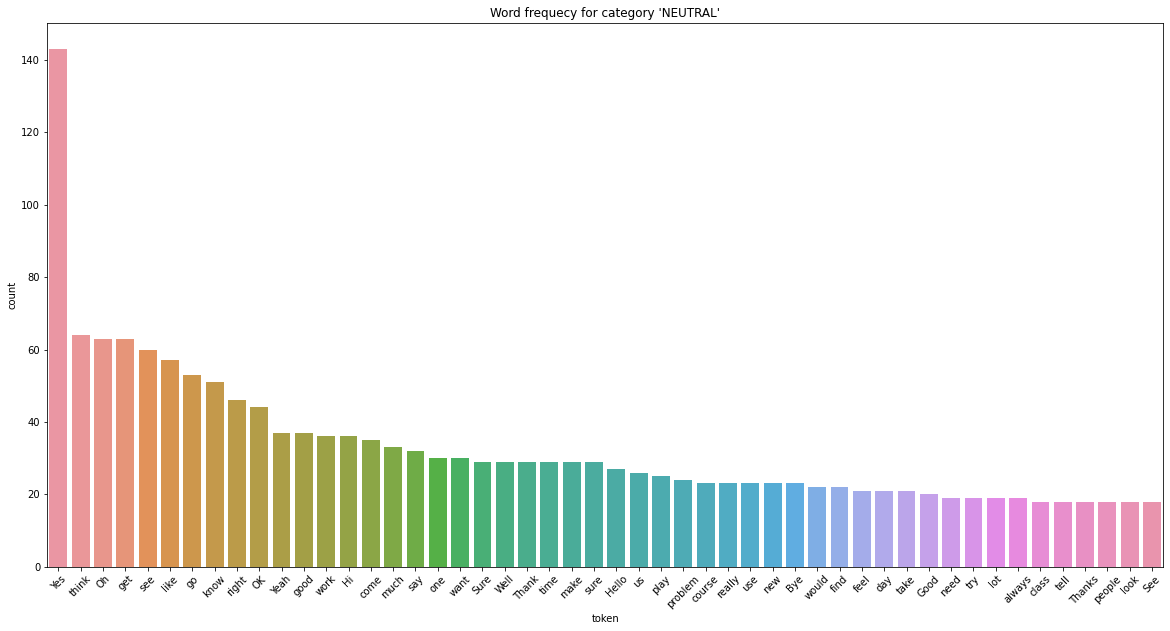

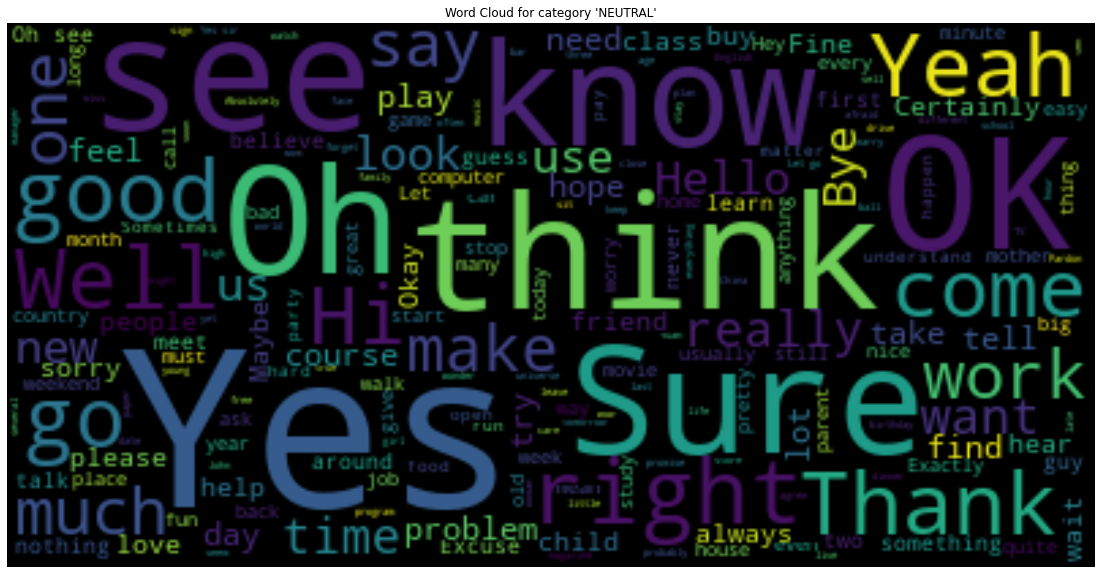

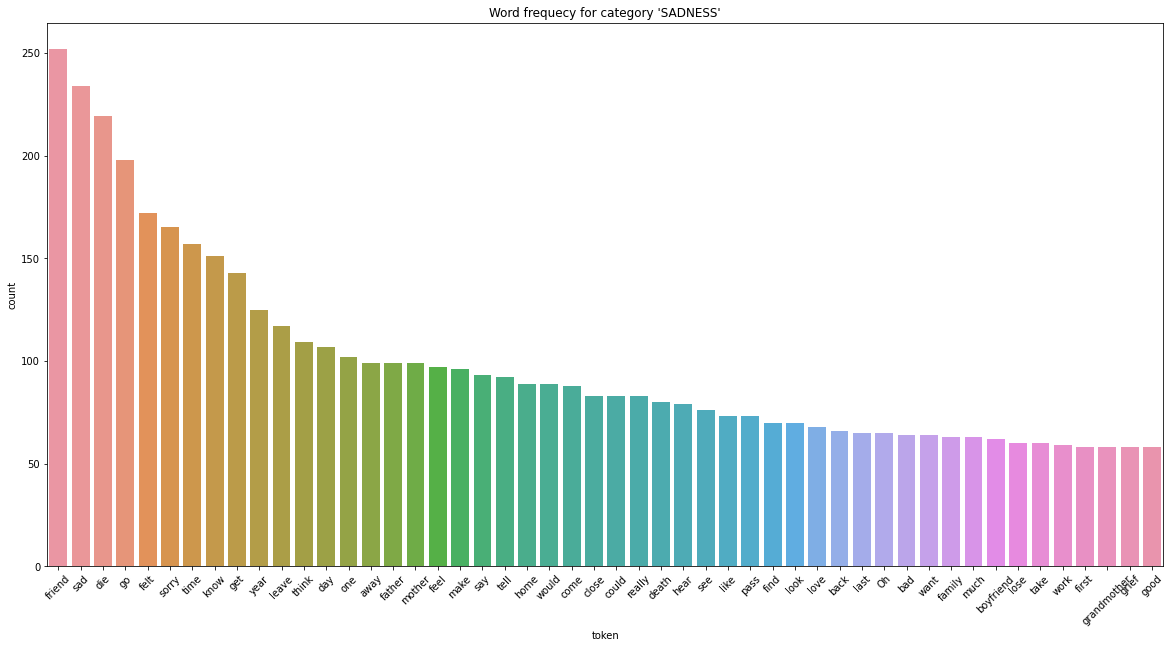

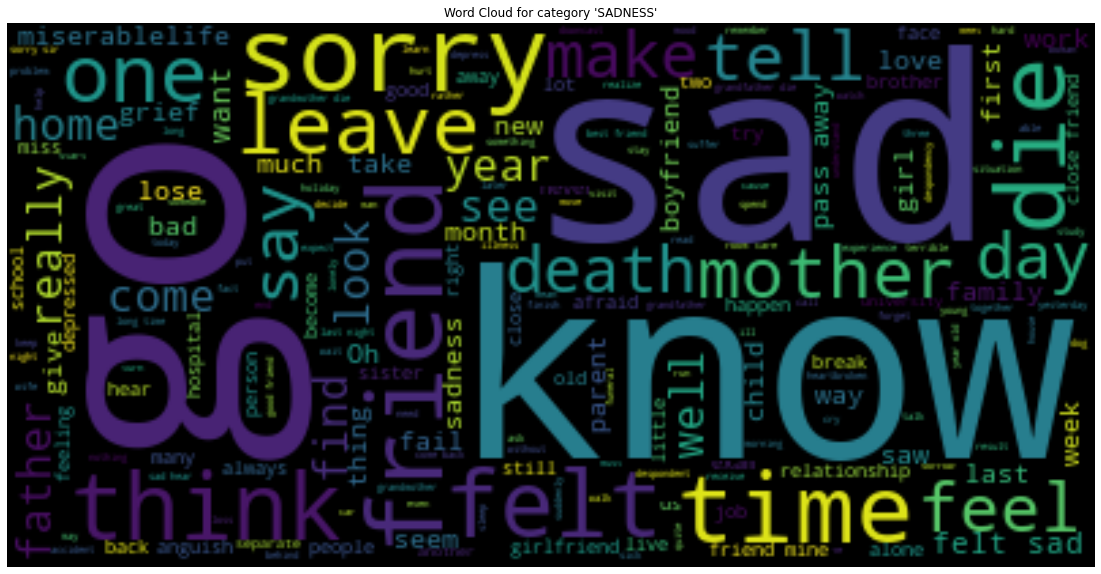

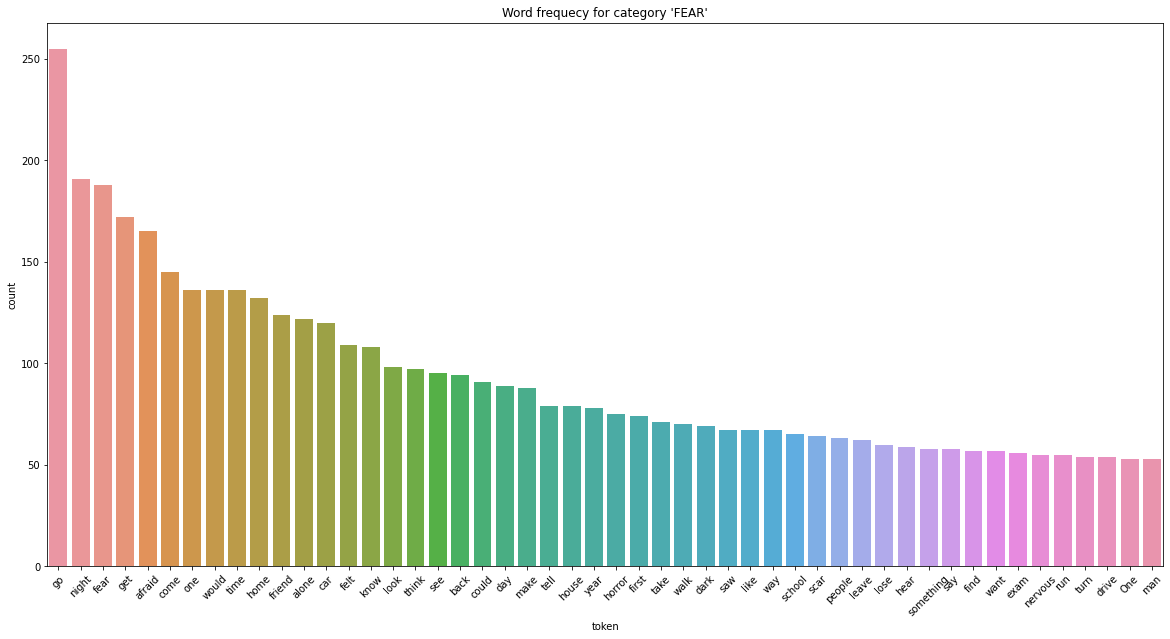

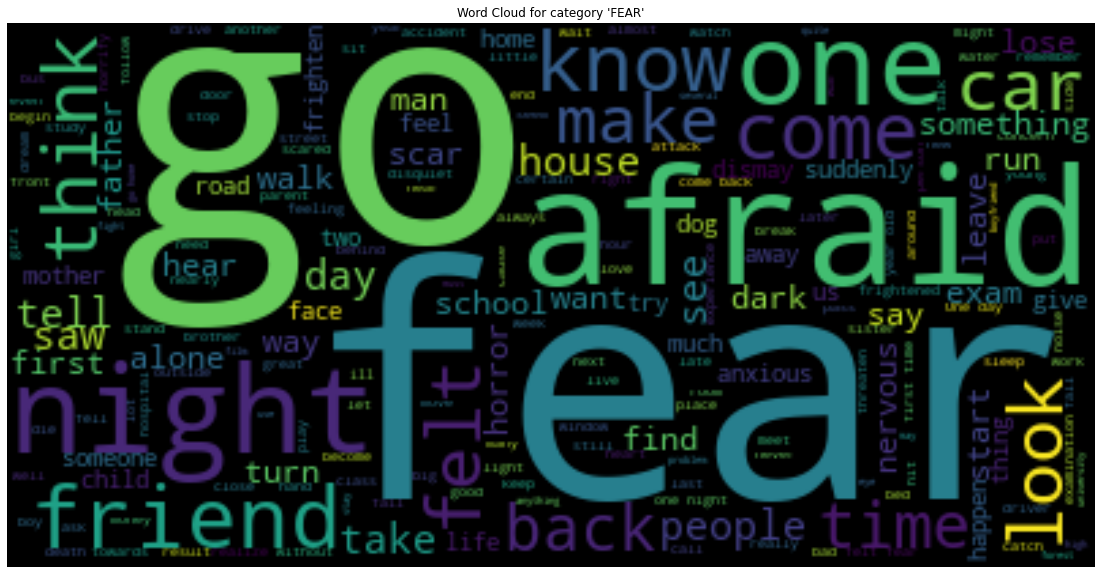

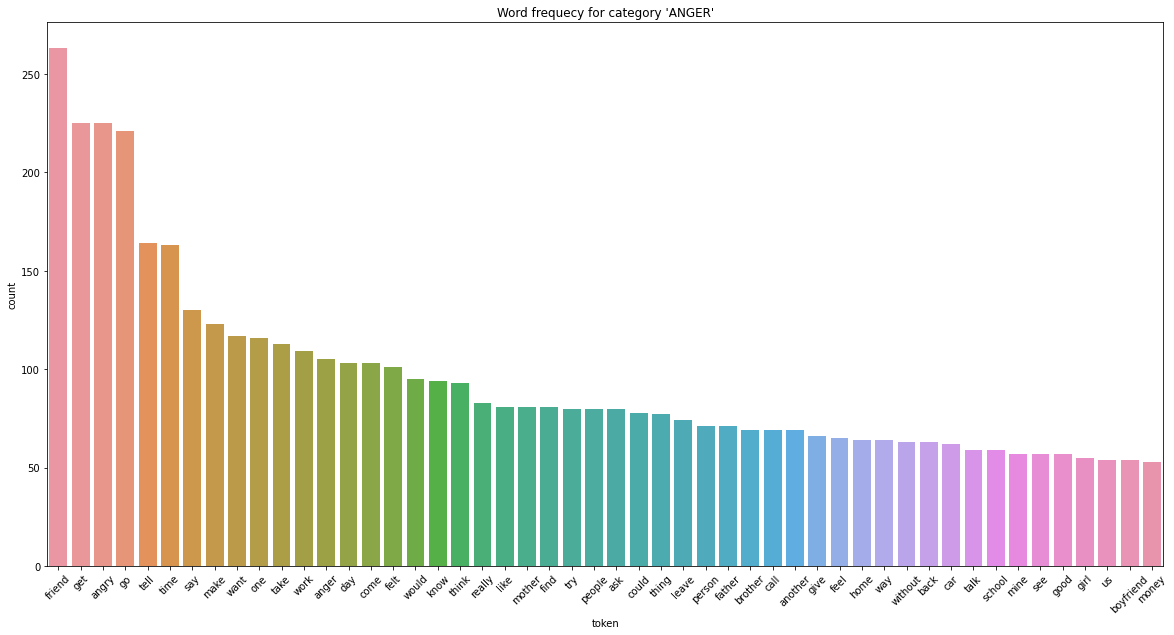

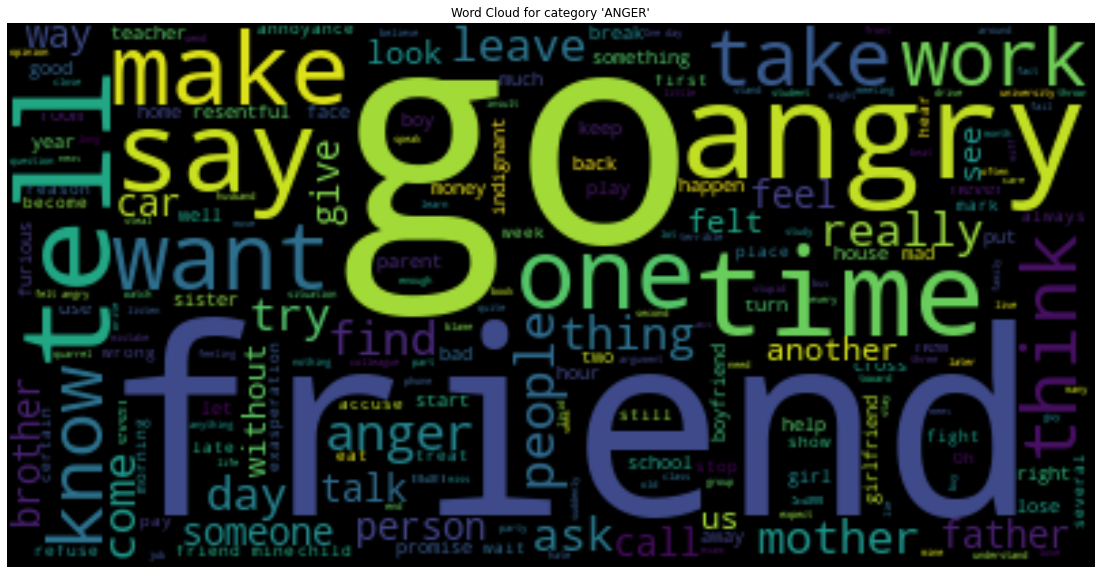

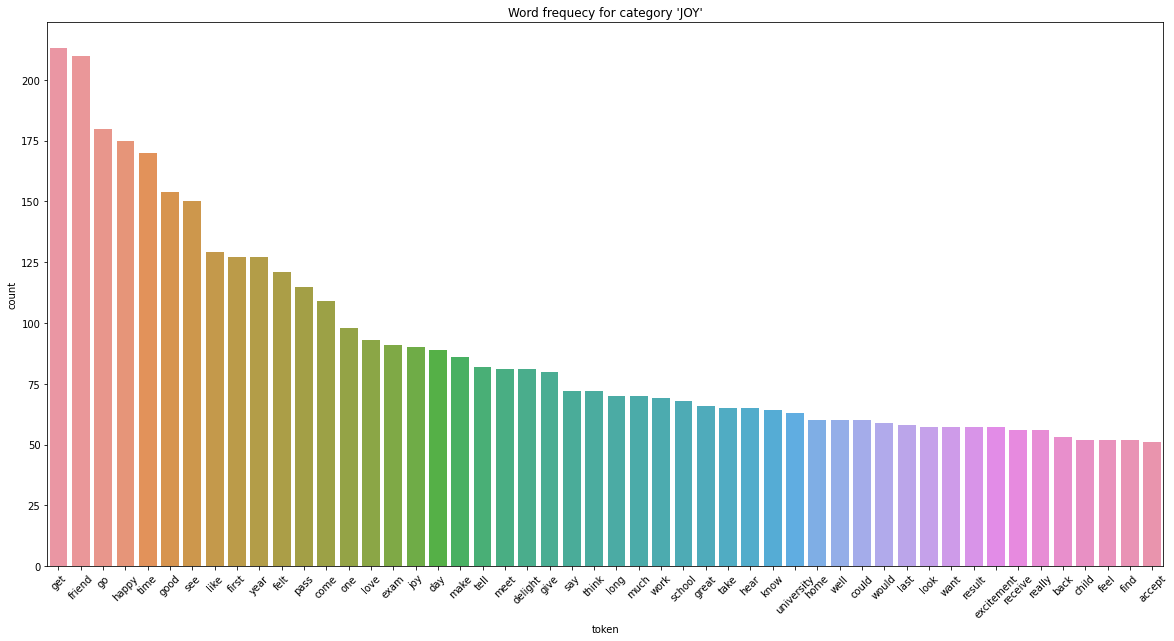

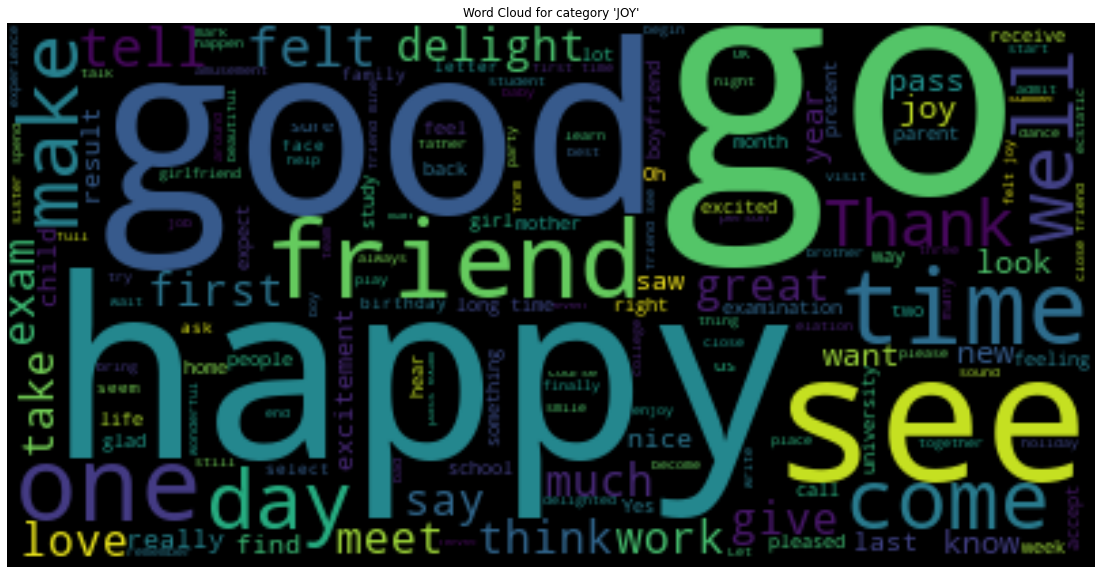

In [ ]:
for category in category_list:
  list_of_words = cleaned_data[cleaned_data['category'] == category]['clean_sentence'].tolist()
  words_joined = ' '.join(list_of_words)
  keywords_extracted = extract_keywords(words_joined)
  plot_most_common_words(keywords_extracted, category)
  plot_word_cloud(words_joined, category)


Classifiers Used


1.   Naive Bayes
2.   Random Forest
3.   Decision Tree
4.   SVC
5.   Linear SVC


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

#Vectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#Metrics
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

In [ ]:
#Build features from our test

Xfeatures = cleaned_data['clean_sentence']
yLabels = cleaned_data['category']

Xfeatures

0                                  ton painting think well
1        Yet dog grow old less capable one day gillie c...
2                        get tube train without pay ticket
3        last may source considerable disquiet one migh...
4        dislike intimacy show towards resentful memory...
                               ...                        
11322    sweetheart leave rather decide break mutual co...
11323    Well bad like different kind movie Maybe diffe...
11324                                                 sure
11325                                   get lay feel sorry
11326                    stupid people push rush time city
Name: clean_sentence, Length: 11327, dtype: object

In [ ]:
#Vectorizer
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)
cv.get_feature_names_out()


array(['aan', 'aaron', 'aaroncurry', ..., 'zone', 'zoo', 'zzap'],
      dtype=object)

In [ ]:

#split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, yLabels, test_size=0.3, random_state=42)

In [ ]:
def train_test(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    return train_acc, test_acc

In [ ]:
nb = MultinomialNB()
rforest = RandomForestClassifier(random_state=123)
dtree = DecisionTreeClassifier()
svc = SVC()
lsvc = LinearSVC(random_state=123)

In [ ]:
classifiers = [nb, rforest, dtree, svc, lsvc]
accuracy_data = pd.DataFrame(columns=['Classifier', 'Test Accuracy', 'Train Accuracy'])
clf = []
test_accuracy = []
train_accuracy = []
for idx, classifier in enumerate(classifiers): 
    classifier_name = classifier.__class__.__name__
    train_acc, test_acc = train_test(classifier, X_train, X_test, Y_train, Y_test)
    clf.append(classifier_name)
    test_accuracy.append(test_acc)
    train_accuracy.append(train_acc)

accuracy_data['Classifier'] = clf
accuracy_data['Test Accuracy'] = test_accuracy
accuracy_data['Train Accuracy'] = train_accuracy


In [ ]:
accuracy_data

,Classifier,Test Accuracy,Train Accuracy
0,MultinomialNB,0.614593,0.769551
1,RandomForestClassifier,0.632539,0.987765
2,DecisionTreeClassifier,0.590468,0.987765
3,SVC,0.653133,0.901615
4,LinearSVC,0.678141,0.950681


In [ ]:
lsvc.classes_

array(['anger', 'fear', 'joy', 'neutral', 'sadness'], dtype=object)

In [ ]:
sent = ["what the fuck are you doing here"]


In [ ]:
def get_predicted_value(text):
  lemma = perform_text_actions(text)
  vect = cv.transform([lemma])
  return lsvc.predict(vect)[0]

Scrapping Peter Pan XML file using BeautifulSoup




In [ ]:
#Importing necesary libraries
import pandas as pd
from bs4 import BeautifulSoup as bsf


Step 1: Opening the xml file named ‘pan.xml’ using and storing it in variable ‘pan’. Then reading and extracting the paragraphs in the xml file.

In [ ]:
#loading the document
pan = open('pan.xml', 'r')

#reading the content
content = pan.read()

#linking the data to be scrapped which is stored in content
soup = bsf(content,'xml')

#extracting and storing data in each paragraphs and storing as para variable
sentences = soup.find_all('s')

#printing all the data
#for data in para:
#    print(data.get_text())

Step 2: Getting text data from XML and storing it in to a list and then converting it into DataFrame

In [ ]:
segmented_book = pd.DataFrame(sentences, columns = ['sentence',])
segmented_book

,sentence
0,"All children, except one, grow up."
1,"They soon know that they will grow\nup, and th..."
2,One day when she was two years old\nshe was pl...
3,I suppose she must have looked rather delightf...
4,This was all that passed between them on\nthe ...
...,...
3195,Our last glimpse\nof her shows her at the wind...
3196,"As you look at Wendy, you may see her hair bec..."
3197,"Jane is now a\ncommon grown-up, with a daughte..."
3198,When Margaret grows up she will have a\ndaught...


# Cleaning the book data set:


*   Removing stopwords like for, a, an, and, etc..
*   Special characters 
*   Punctuations




In [ ]:
segmented_book['clean_text'] = segmented_book['sentence'].apply(perform_text_actions)

In [ ]:
segmented_book

,sentence,clean_text
0,"All children, except one, grow up.",child except one grow
1,"They soon know that they will grow\nup, and th...",soon know grow way Wendy know
2,One day when she was two years old\nshe was pl...,One day two year old play garden pluck another...
3,I suppose she must have looked rather delightf...,suppose must look rather delightful Mrs Darlin...
4,This was all that passed between them on\nthe ...,pass subject henceforth Wendy know must grow
...,...,...
3195,Our last glimpse\nof her shows her at the wind...,last glimpse show window watch recede sky smal...
3196,"As you look at Wendy, you may see her hair bec...",look Wendy may see hair become white figure li...
3197,"Jane is now a\ncommon grown-up, with a daughte...",Jane common grow daughter call Margaret every ...
3198,When Margaret grows up she will have a\ndaught...,Margaret grow daughter Peter mother turn thus ...


##Making Prediction

In [ ]:
predicted = []
for sentence in segmented_book['sentence']:
  pred_val = get_predicted_value(sentence)
  predicted.append(pred_val)
segmented_book['predicted'] = predicted

In [ ]:
segmented_book

,sentence,clean_text,predicted
0,"All children, except one, grow up.",child except one grow,neutral
1,"They soon know that they will grow\nup, and th...",soon know grow way Wendy know,sadness
2,One day when she was two years old\nshe was pl...,One day two year old play garden pluck another...,joy
3,I suppose she must have looked rather delightf...,suppose must look rather delightful Mrs Darlin...,sadness
4,This was all that passed between them on\nthe ...,pass subject henceforth Wendy know must grow,joy
...,...,...,...
3195,Our last glimpse\nof her shows her at the wind...,last glimpse show window watch recede sky smal...,sadness
3196,"As you look at Wendy, you may see her hair bec...",look Wendy may see hair become white figure li...,joy
3197,"Jane is now a\ncommon grown-up, with a daughte...",Jane common grow daughter call Margaret every ...,neutral
3198,When Margaret grows up she will have a\ndaught...,Margaret grow daughter Peter mother turn thus ...,joy


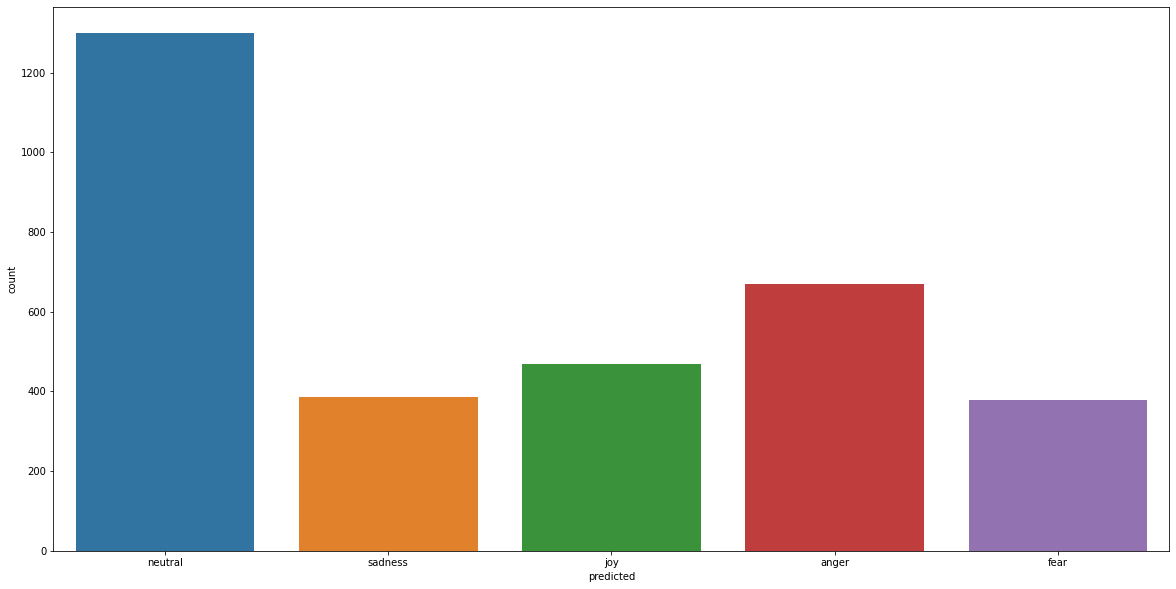

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(x='predicted', data=segmented_book)
plt.show()